(lgm-mixed-notebook)=
# LGM e modelli misti 

In [1]:
source("_common.R")
library("lavaan")
library("semPlot")
library("knitr")
library("markdown")
library("patchwork")
library("DT")
library("kableExtra")
library("lme4")
set.seed(12345)

This is lavaan 0.6-15
lavaan is FREE software! Please report any bugs.




Attaching package: ‘kableExtra’




The following object is masked from ‘package:dplyr’:

    group_rows




Loading required package: Matrix




Attaching package: ‘Matrix’




The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




## Modelli a crescita latente e modelli misti

I modelli di crescita latente (LGM) sono un caso speciale di analisi fattoriale confermativa (CFA) e corrispondono a un modello CFA a due fattori in cui le saturazioni fattoriali sono fissate a valori predefiniti. Nella loro forma più semplice, i modelli LGM sono equivalenti ai modelli a effetti misti nell’analisi di regressione. Pertanto, descrivere i modelli misti ci aiuterà a comprendere meglio i modelli LGM. 

In molti casi, la traiettoria nel tempo può essere modellata come una semplice funzione lineare o quadratica. Le differenze individuali vengono catturate dagli *effetti random* che sono convenientemente rappresentati da variabili latenti (continue), spesso chiamate *fattori di crescita* (*growth factors*). 

Supponiamo che la variabile misurata rappresenti una qualche dimensione psicologica $y$. Ci possiamo chiedere domande come le seguenti:

- la $y$ tende ad aumentare nei termini di una relazione lineare?
- se la $y$ tende ad aumentare nei termini di una relazione lineare, qual è in media la pendenza di questa retta?
- in che misura questa pendenza varia tra i partecipanti?
- in che misura questa pendenza dipende dall'effetto di qualche altra variabile $x$?
- in che misura questa pendenza differisce tra gruppi di partecipanti?
- in che misura la $y$ durante nella prima rilevazione temporale varia tra i partecipanti?
- in che misura la $y$ nella prima rilevazione temporale dipende dall'effetto di qualche altra variabile $x$?

Queste sono alcune delle domande a cui si può rispondere usando i modelli LGM. In questo capitolo verranno introdotti i modelli misti e verrà fatto un confronto tra modelli misti e modelli LGM.

### Modelli misti

Il modello lineare standard presuppone l’indipendenza delle osservazioni. Tuttavia, i modelli misti considerano la presenza di cluster di osservazioni, come ad esempio misure ripetute per lo stesso individuo nel tempo.

Per gestire la correlazione tra le osservazioni raggruppate, si possono utilizzare i modelli a effetti misti. Questi modelli sono impiegati quando si hanno dati raccolti da più cluster, ognuno con caratteristiche uniche ma anche condivise. Un esempio comune di modello misto è quello utilizzato per analizzare dati longitudinali. In questo caso, il modello può includere un effetto fisso per il tempo e un effetto casuale per ogni unità.

I modelli misti rappresentano un compromesso tra la modellizzazione pooled e quella separata. La modellizzazione pooled combina tutti i dati in un unico dataset, ma può portare a una perdita di informazioni sulle differenze tra i gruppi di osservazioni. La modellizzazione separata adatta un modello per ogni gruppo di osservazioni, ma può portare a problemi di sovrapparametrizzazione e scarsa generalizzazione ai nuovi dati.

I modelli misti risolvono questi problemi combinando la modellizzazione pooled e quella separata. In questo modo, il modello tiene conto delle differenze tra i gruppi di dati e sfrutta l’informazione comune per migliorare la precisione delle stime dei parametri.

Il caso seguente descrive un modello misto una struttura di raggruppamento annidata. I cluster che producono gli effetti casuali non devono necessariamente essere gerarchici, tuttavia utilizziamo qui una tale rappresentazione per semplicità.

$$
\begin{equation}
y_{k} = \alpha + \beta \cdot x_{k} + \varepsilon_{k}, \quad k = 1, \dots, K,
\end{equation}
$$(eq-lgm-1)

dove gli $\{\varepsilon_k\}$ sono variabili casuali indipendenti e identicamente distribuite con varianza costante $\sigma^2$.

Nel caso delle misure ripetute viene violata l'assunzione che i dati siano variabili casuali indipendenti. Un modo per modellizzare una variabile casuale organizzata in maniera gerarchica è quello di assumere che ciascun ragruppamento sia dotato di una sua specifica intercetta.

$$
\begin{equation}
y_{ij} = \alpha_i + \beta \cdot x_{ij} + \varepsilon_{ij}, \quad i = 1, \dots, N, j = 1, \dots, n_i.
\end{equation}
$$(eq-lgm-2)

Si noti che abbiamo usato due indici: $i$ corrisponde all'$i$-esimo ragruppamento, $j$ corrisponde alla osservazione $j$-esima nell'$i$-esimo ragruppamento, $n_i$ è il numero di osservazioni nell'$i$-esimo ragruppamento e $\alpha_i$ è l'intercetta specifica al ragruppamento $i$-esimo. Il numero totale di osservazioni è $K = \sum_{i=1}^N n_i$. Per quel che riguarda gli errori $\{\varepsilon_{ij}\}$ assumiamo come in precedenza che siano iid  con varianza $\sigma^2$.

Il modello per dati ragruppati è più complesso del modello tradizionale e si riduce ad esso nel caso speciale nel quale $\alpha_i = \alpha$.

L'assunzione centrale dei modelli misti è che le intercette $\{\alpha_i, i = 1, \dots, N\}$ siano variabili casuali che appartengono ad una popolazione che può essere descritta dalla seguente equazione:

$$
\begin{equation}
\alpha_i = \alpha + b_i,
\end{equation}
$$(eq-lgm-3)

dove $\alpha$ è l'intercetta della popolazione e $b_i$ è l'effetto casuale, ovvero la deviazione di ciascun ragruppamento dal valore medio della popolazione. 

Sostituendo l'eq. {eq}eq-lgm-3 nella {eq}eq-lgm-2) otteniamo il modello ad effetti misti:

$$
\begin{equation}
y_{ij} = \alpha + b_i + \beta \cdot x_{ij} + \varepsilon_{ij}, \quad i = 1, \dots, N, j = 1, \dots, n_i,
\end{equation}
$$(eq-lgm-4)

ovvero

$$
\begin{equation}
y_{ij} = \alpha + \beta \cdot x_{ij} + \eta_{ij}, \quad i = 1, \dots, N, j = 1, \dots, n_i, 
\end{equation}
$$(eq-lgm-5)

dove $\eta_{ij} = \varepsilon_{ij} + b_i$. Questo è un modello gerarchico, ovvero un modello ad intercetta casuale. 

In pratica, ciò che abbiamo ottenuto è un modello di regressione standard con una fonte aggiuntiva di varianza. In un modello misto ci sono dunque due fonti della varianza: la variazione all'interno di ciascun ragruppamento, $\sigma^2$ e la variazione tra ragruppamenti, $\sigma_b^2$. Ricordiamo che, invece, nel modello classico abbiamo un'unica fonte della varianza. 

Nel modello misto, le osservazioni all'interno di ciascun ragruppamento sono tra loro correlate con una correlazione uguale a

$$
\begin{equation}
\rho = \frac{\mathbb{V}(b_i)}{\mathbb{V}(b_i + \varepsilon_{ij})} = \frac{\sigma_b^2}{\sigma^2 + \sigma_b^2}.
\end{equation}
$$(eq-lgm-6)

Dalla {eq}`eq-lgm-6` risulta che maggiore è la variazione tra i ragruppamenti, maggiore è la correlazione tra le osservazioni all'interno di ciascun ragruppamento. Se $\sigma_b^2 = 0$, la correlazione è 0, $\alpha_i = \alpha$ e il modello si riduce a quello della regressione classica. 

Questa è solo una rappresentazione possibile dei modelli misti, in quanto è anche possibile consentire alla pendenza di variare, avere effetti casuali da più fonti di raggruppamento, aggiungere covariate a livello di ragruppamento, consentire alle intercette casuali e alle pendenze di correlare tra loro, ecc. 

Come abbiamo visto in precedenza, le variabili latenti sono assunte come distribuite normalmente, di solito con media zero e con una varianza stimata. Anche gli effetti casuali nei modelli misti lo sono e attraverso questo parallelo possiamo pensare agli effetti casuali come a delle variabili latenti (e viceversa). 

### Simulare effetti casuali

Possiamo fornire una dimostrazione del funzionamento dei modelli misti con una simulazione. Ciò ci permetterà di meglio comprendere i modelli a crescita latente. Simuleremo dei dati bilanciati, con punteggi su quattro rilevazioni temporali per 500 individui (soggetti). Esamineremo il tasso di crescita ('growth') e consentiremo la presenza di intercette e pendenze specifiche per i diversi soggetti.

Le istruzioni seguenti generano i dati (per i nostri scopi, non è importante capire i dettagli di questa porzione di codice).

In [2]:
set.seed(12345)
n <- 500
timepoints <- 4
time <- rep(0:3, times = n)
subject <- rep(1:n, each = 4)

intercept <- .5
slope <- .25
randomEffectsCorr <- matrix(c(1, .2, .2, 1), ncol = 2)

randomEffects <- MASS::mvrnorm(
  n,
  mu = c(0, 0), Sigma = randomEffectsCorr, empirical = T
) %>%
  data.frame()

colnames(randomEffects) <- c("Int", "Slope")

La simulazione comprende gli effetti 'fissi', ovvero l'intercetta e la pendenza della regressione standard, impostati rispettivamente a 0.5 e 0.25. Verrà simulata una correlazione di 0.2 tra intercetta e pendenza specifiche per ciascun soggetto. Per questa ragione, i dati verranno estratti da una distribuzione normale multivariata. Porremo uguale a 1 la varianza per entrambi gli effetti.

Esaminiamo i dati ottenuti.

In [3]:
data.frame(Subject = subject, time = time, randomEffects[subject, ]) %>%
    head(10)

,Subject,time,Int,Slope
,<int>,<int>,<dbl>,<dbl>
1,1,0,-1.3322902,-0.9548087
1.1,1,1,-1.3322902,-0.9548087
1.2,1,2,-1.3322902,-0.9548087
1.3,1,3,-1.3322902,-0.9548087
2,2,0,-2.1261548,-1.7813625
2.1,2,1,-2.1261548,-1.7813625
2.2,2,2,-2.1261548,-1.7813625
2.3,2,3,-2.1261548,-1.7813625
3,3,0,0.4606242,0.3039838


Per ottenere una variabile target, sommiamo semplicemente gli effetti casuali così ottenuti all’intercetta complessiva e facciamo lo stesso per le pendenze. Sommeremo ai dati un rumore gaussiano con deviazione standard uguale a $\sigma$ = 0.5.

In [4]:
set.seed(12345)
sigma <- .5
y1 <- (intercept + randomEffects$Int[subject]) + # random intercepts
  (slope + randomEffects$Slope[subject]) * time + # random slopes
  rnorm(n * timepoints, mean = 0, sd = sigma)

d <- data.frame(subject, time, y1)

In [5]:
d %>%
  head(10) 

,subject,time,y1
,<int>,<int>,<dbl>
1,1,0,-0.5395258
2,1,1,-1.1823659
3,1,2,-2.2965593
4,1,3,-3.1734649
5,2,0,-1.3232110
6,2,1,-4.0664952
7,2,2,-4.3738304
8,2,3,-6.3583342
9,3,0,0.8185443


Il grafico seguente mostra le rette di regressione per ciascuno dei 500 soggetti.

`geom_smooth()` using formula = 'y ~ x'


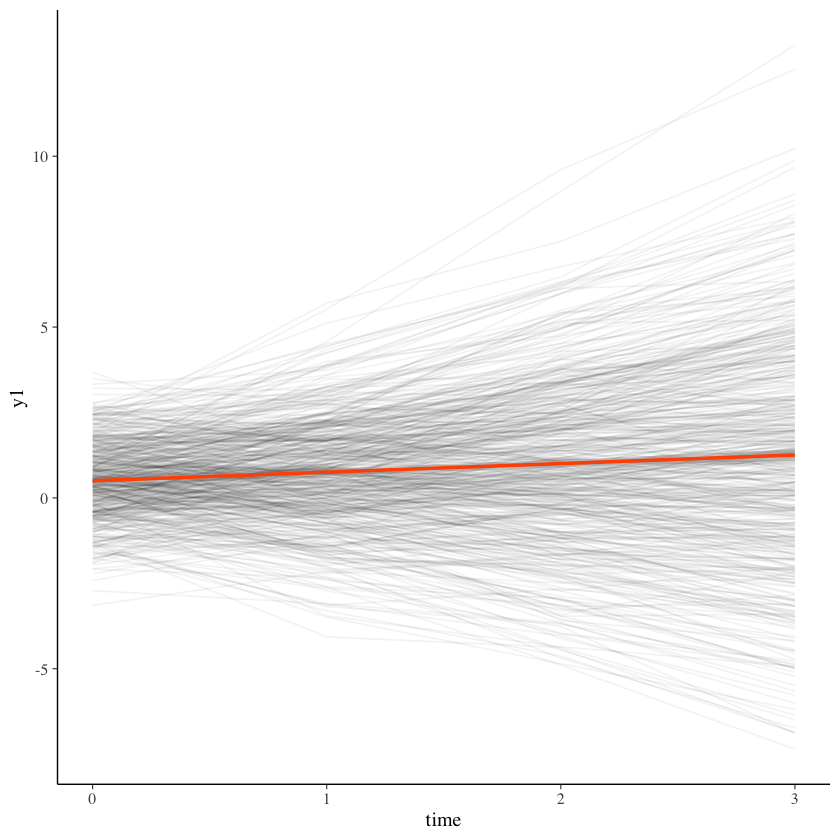

In [6]:
ggplot(d, aes(x = time, y = y1)) +
  geom_path(aes(group = subject), alpha = .05) +
  geom_smooth(method = "lm", color = "#ff5500")

Adattiamo ai dati un modello misto utilizzando la funzione `lmer` del pacchetto `lme4`. 

In [7]:
mix_mod <- lmer(y1 ~ time + (1 + time | subject), data = d)
summary(mix_mod)

Linear mixed model fit by REML ['lmerMod']
Formula: y1 ~ time + (1 + time | subject)
   Data: d

REML criterion at convergence: 5881.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.03499 -0.46249  0.00414  0.48241  2.74992 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 1.0245   1.0122       
          time        1.0301   1.0149   0.15
 Residual             0.2412   0.4911       
Number of obs: 2000, groups:  subject, 500

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.50159    0.04885  10.267
time         0.25157    0.04644   5.417

Correlation of Fixed Effects:
     (Intr)
time 0.072 

Gli effetti fissi che abbiamo ottenuto ($\alpha$ = 0.50159, $\beta$ = 0.25157) sono simili ai valori che abbiamo impostato per l'intercetta e la pendenza complessiva. Le varianze degli effetti casuali stimati ($1.0122^2$, $1.0149^2$) sono molto simili al valore impostato di 1, la correlazione (0.15) è simile al valore impostato di 0.2 e la deviazione standard dei residui (0.4911) è simile al valore impostato di 0.5.

## Modello di crescita latente

<!-- https://github.com/m-clark/sem/blob/master/growth-curves.Rmd -->

Analizziamo ora gli stessi dati con un modello LGM. Possiamo pensare ai modelli LGM come ad un'estensione del modello CFA dotato di `meanstructure`. Infatti, dobbiamo modellare la relazione tra le medie dei punteggi dei partecipanti in funzione del tempo.

L'inclusione della `meanstructure` significa che non possiamo usare in input la matrice di covarianza campionaria, ma dobbiamo invece utilizzare i dati grezzi (ovvero, le singole osservazioni per ciascun partecipante). 

Come in precedenza, useremo `lavaan`, ma ora con una sintassi diversa, perché dobbiamo fissare le saturazioni fattoriali a valori specifici per implementare i vincoli del modello. Questo porta anche a un output non standard rispetto ad altri modelli SEM, poiché i parametri del modello saranno fissi non devono essere stimati.

In particolare, avremo una variabile latente per le intercette casuali e una seconda variabile latente le pendenze casuali. Per il fattore che rappresenta le intercette, i valori delle saturazioni fattoriali sono fissati a 1. Le saturazioni per il fattore che specifica le pendenze casuali sono fissate ai valori che descrivono la variazione temporale: qui i valori $\lambda$ da 0 a 3 (riflettono la spaziatura temporale tra le misurazioni $y$). Iniziare la codifica da 0 consente di assegnare allo 0 un’interpretazione dotata di significato.

Il modello di crescita latente può dunque essere specificato dal seguente modello a variabili latenti:

$$
y_j = \alpha_0 + \alpha_1 \lambda_j + \zeta_{00} + \zeta_{11} \lambda_j + \epsilon_j,
$$
dove 

- $y_j$ è la variabile di interesse che cambia nel tempo, con $j = 0, \dots, 3$.
- $\alpha_0$ rappresenta l'intercetta della retta di regressione al tempo $t = 0$ (il punto di partenza della linea nera sopra).
- $\alpha_1 \lambda_j$ è il tasso medio di crescita nel tempo (la pendenza della linea nera nel grafico sopra). Qui $\lambda_j$ è solo l'indice dei punti temporali considerati (0, 1, 2, 3).
- $\zeta_{00}$ è la varianza tra i soggetti nel punto $t = 0$.
- $\zeta_{11} \lambda_j$ è la varianza del tasso di crescita tra i soggetti.
- $\epsilon_j$ è la varianza di ciascun soggetto attorno alla sua retta di regressione.

Un requisito degli LGM è che i dati devono essere forniti del formato *wide* (mentre per il precedente modello misto abbiamo usato il formato *long*), il che significa che ogni colonna rappresenta la variabile di esito in un diverso momento nel tempo. Si presume che ogni osservazione o riga sia indipendente dalle altre; le colonne mostrano invece una dipendenza temporale. Trasformiamo dunque i dati nel formato richiesto.

In [8]:
dWide <- d %>%
  spread(time, y1) %>%
  rename_at(vars(-subject), function(x) paste0("y", x))
head(dWide)

,subject,y0,y1,y2,y3
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-0.5395258,-1.1823659,-2.2965593,-3.173465
2,2,-1.3232110,-4.0664952,-4.3738304,-6.358334
3,3,0.8185443,1.0549470,2.0104678,3.531232
4,4,0.4469440,-0.3162615,-1.7896354,-1.843919
5,5,1.8959902,5.5259110,9.6045869,12.546123
6,6,2.1829579,1.6287374,-0.3136214,-1.660328


Il modello misto che abbiamo descritto in precedenza corrisponde dunque ad un modello fattoriale con due variabili latenti: un fattore ($\eta_0$) che rappresenta il "punteggio vero" delle intercette individuali e un fattore ($\eta_1$) che rappresenta il "punteggio vero" delle pendenze delle rette di regressione per i singoli individui.

Nella sintassi di `lavaan` il modello diventa:

In [9]:
model <- "
    i =~ 1*y0 + 1*y1 + 1*y2 + 1*y3
    s =~ 0*y0 + 1*y1 + 2*y2 + 3*y3
"

Possiamo adattare il modello ai dati usando una funzione specifica di `lavaan`, ovvero `growth`, che può essere usata per questa classe di modelli. 

In [10]:
growth_curve_model <- growth(model, data = dWide)
out <- summary(growth_curve_model)
print(out)

lavaan 0.6.15 ended normally after 41 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9

  Number of observations                           500

Model Test User Model:
                                                      
  Test statistic                                 4.212
  Degrees of freedom                                 5
  P-value (Chi-square)                           0.519

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)
  i =~                                                
    y0                1.000                           
    y1                1.000                           
    y2                1.000                           
   

Usiamo l’oggetto creato da `growth` per creare un diagramma di percorso.

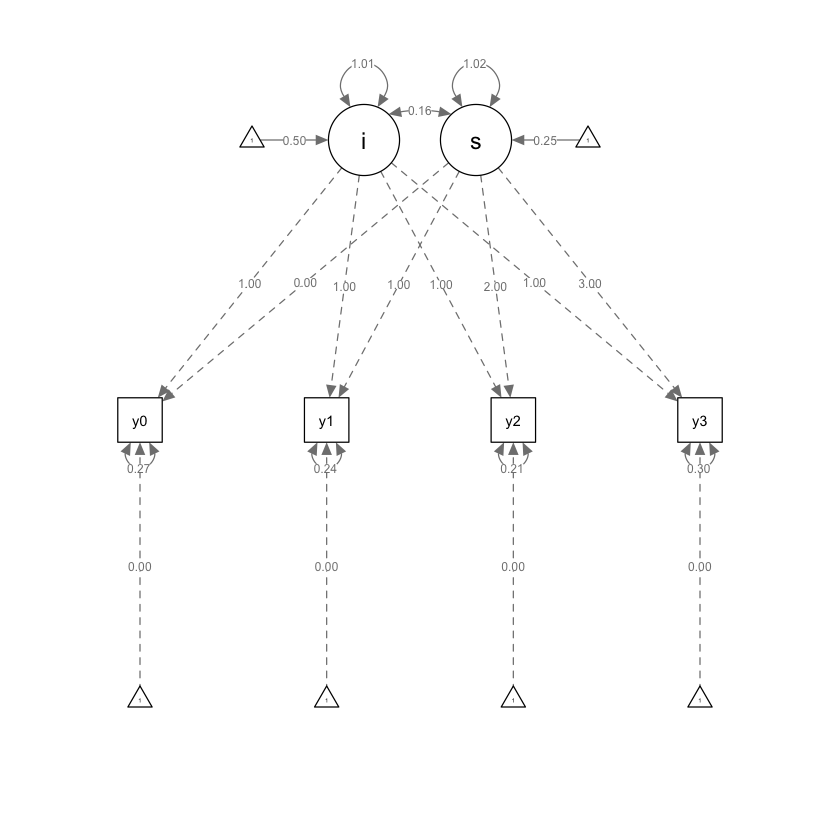

In [11]:
semPaths(growth_curve_model, what = "path", whatLabels = "par")

Nell'output, `Intercepts` corrisponde agli effetti fissi:

```
Intercepts:
                   Estimate  Std.Err  z-value  P(>|z|)
    i                 0.510    0.048   10.542    0.000
    s                 0.234    0.046    5.133    0.000
```

Potrebbe sembrare strano chiamare gli effetti fissi 'intercette', ma ha senso se  pensiamo al modello a crescita latente come al modello misto descritto in precedenza. Si noti che le stime ottenute sono molto simili a quelle fornite dal modello misto

In [12]:
fixef(mix_mod)

(Intercept)        time 
  0.5015932   0.2515722

Si noti inoltre che le stime degli effetti fissi del modello misto sono identiche a quelle trovate dalla regressione standard:

In [13]:
lm(y1 ~ time, data = d)


Call:
lm(formula = y1 ~ time, data = d)

Coefficients:
(Intercept)         time  
     0.5016       0.2516  


Consideriamo ora le stime della varianza nel modello a crescita latente.

```
Covariances:
                   Estimate  Std.Err  z-value  P(>|z|)
  i ~~                                                
    s                 0.220    0.050    4.371    0.000
Variances:
                   Estimate  Std.Err  z-value  P(>|z|)
   .y0                0.310    0.042    7.308    0.000
   .y1                0.220    0.021   10.338    0.000
   .y2                0.230    0.029    7.935    0.000
   .y3                0.275    0.064    4.295    0.000
    i                 0.973    0.076   12.854    0.000
    s                 0.986    0.066   14.889    0.000
```

Confrontiamo questi valori con quelli ottenuti dal modello misto.

In [14]:
VarCorr(mix_mod)

 Groups   Name        Std.Dev. Corr 
 subject  (Intercept) 1.01217       
          time        1.01494  0.150
 Residual             0.49108       

Si noti che il modello a crescita latente, per impostazione predefinita, assume una varianza eterogenea per ogni rilevazione temporale. I modelli misti per impostazione predefinita assumono la stessa varianza per ogni punto temporale ma, nella maggior parte dei pacchetti di modellizzazione, consentono di specificare una stima separata della varianza nelle diverse rilevazioni temporali.

Se fissiamo le varianze come uguali, i due modelli producono stime identiche.

In [15]:
model <- "
    # intercept and slope with fixed coefficients
    i =~ 1*y0 + 1*y1 + 1*y2 + 1*y3
    s =~ 0*y0 + 1*y1 + 2*y2 + 3*y3
    y0 ~~ resvar*y0
    y1 ~~ resvar*y1
    y2 ~~ resvar*y2
    y3 ~~ resvar*y3
"

growth_curve_model <- growth(model, data = dWide)
out <- summary(growth_curve_model)
print(out)

lavaan 0.6.15 ended normally after 27 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9
  Number of equality constraints                     3

  Number of observations                           500

Model Test User Model:
                                                      
  Test statistic                                 6.180
  Degrees of freedom                                 8
  P-value (Chi-square)                           0.627

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)
  i =~                                                
    y0                1.000                           
    y1                1.000                           
   

Per `lme4` abbiamo: 

In [16]:
print(VarCorr(mix_mod), comp = "Var")

 Groups   Name        Variance Cov  
 subject  (Intercept) 1.02448       
          time        1.03011  0.154
 Residual             0.24116       


In entrambi i casi, la varianza residua è uguale a 0.241 e la correlazione tra intercette e pendenze casuali è uguale a 0.154.

Inoltre, le stime dei coefficienti casuali del modello misto sono identiche a quelle delle variabili latenti. 

In [17]:
ranef_latent <- data.frame(
  coef(mix_mod)[[1]], lavPredict(growth_curve_model)
) %>%
  rename(
    Int_mix = X.Intercept.,
    Slope_mix = time,
    Int_lgc = i,
    Slope_lgc = s
  )
ranef_latent %>%
  round(2) %>%
  head()

,Int_mix,Slope_mix,Int_lgc,Slope_lgc
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.40,-0.91,-0.40,-0.91
2,-1.53,-1.59,-1.53,-1.59
3,0.54,0.88,0.54,0.88
4,0.31,-0.79,0.31,-0.79
5,2.03,3.53,2.03,3.53
6,2.06,-1.14,2.06,-1.14


## Conclusioni

In conclusione, abbiamo visto che, nel caso più semplice, i modelli LGM sono sostanzialente identici ai modelli misti. Tuttavia, la concettualizzazione del cambiamento nei termini di un modello a crescita latente offre molti vantaggi rispetto alla descrizione dei dati nei termini dei modelli misti in quanto i modelli LGM sono più flessibili dei modelli misti e consentono la verifica di ipotesi statistiche che non possono essere esaminate nel constesto dei modelli misti.